<a href="https://colab.research.google.com/github/paulojr0/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importação de Bibliotecas e arquivo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/BRAZIL_CITIES.csv", sep=';')
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)

                  CITY STATE  CAPITAL  IBGE_RES_POP  IBGE_RES_POP_BRAS  \
0      Abadia De Goiás    GO        0        6876.0             6876.0   
1  Abadia Dos Dourados    MG        0        6704.0             6704.0   
2            Abadiânia    GO        0       15757.0            15609.0   
3               Abaeté    MG        0       22690.0            22690.0   
4           Abaetetuba    PA        0      141100.0           141040.0   

   IBGE_RES_POP_ESTR  IBGE_DU  IBGE_DU_URBAN  IBGE_DU_RURAL  IBGE_POP  ...  \
0                0.0   2137.0         1546.0          591.0    5300.0  ...   
1                0.0   2328.0         1481.0          847.0    4154.0  ...   
2              148.0   4655.0         3233.0         1422.0   10656.0  ...   
3                0.0   7694.0         6667.0         1027.0   18464.0  ...   
4               60.0  31061.0        19057.0        12004.0   82956.0  ...   

   Pu_Bank   Pr_Assets    Pu_Assets    Cars  Motorcycles  Wheeled_tractor  \
0      Na

2. Listas, Dicionários e Tuplas

In [ ]:
# Lista
regiao_turismo = list(df['REGIAO_TUR'].dropna())
for regiao in regiao_turismo[:10]:
    print(regiao)

# Dicionário
dicionario = dict(zip(df['CITY'][:5], df['STATE'][:5]))
print(dicionario)

# Tupla
linha0 = df.iloc[2631]
minha_tupla = (linha0['CITY'], linha0['RURAL_URBAN'],linha0['IDHM'])
print(minha_tupla)

Caminhos Do Cerrado
Região Turística Do Ouro E Cristais
Lago De Três Marias
Araguaia-Tocantins
Chapada Diamantina
Vale Do Contestado
Amazônia Atlântica
Grande Oeste
Montanhas E Fé
Costa Náutica Coroa Do Avião
{'Abadia De Goiás': 'GO', 'Abadia Dos Dourados': 'MG', 'Abadiânia': 'GO', 'Abaeté': 'MG', 'Abaetetuba': 'PA'}
('Juiz De Fora', 'Urbano', np.float64(0.778))


3. Estruturas Condicionais e Laços

Para a condicional if, usei a linha 2631 para identificar dados da minha cidade Juiz de Fora-MG. Então o comando me traz a população da cidade, e a classificação da cidade (grande, média ou pequena), criada a partir de informações do IBGE que considera cidade grande acima de 500 mil habitantes, média entre 100 mil a 499 mil e abaixo disso, pequena.

No for, calculei a média de população idosa, ou seja, com mais de 60 anos para as células com valores válidos, que são verificador com a função dropna() do pandas.

E no While trouxe um top 10 das maiores cidades do Brasil.

In [6]:
# Condicional
coluna_numerica = 'IBGE_RES_POP'
primeiro_valor = df[coluna_numerica][2631]
print("A poupulação de Juiz de Fora é: ",primeiro_valor)
if primeiro_valor > 500000:
    print("Cidade grande!")
elif primeiro_valor > 100000:
    print("Cidade média!")
else:
    print("Cidade pequena!")

# For
soma = 0
lista = list(df['IBGE_60+'].dropna())
for n in lista:
    soma += n
media = soma/len(lista)
print("A média de população 60+ é: ",media)

# While
df_ordenado = df.sort_values(by='IBGE_RES_POP', ascending=False).reset_index(drop=True)
i = 0
while i < 10:
    cidade = df_ordenado.iloc[i]['CITY']
    populacao = df_ordenado.iloc[i]['IBGE_RES_POP']
    print(f"{i+1}º lugar: {cidade} - População: {populacao}")
    i += 1

A poupulação de Juiz de Fora é:  516247.0
Cidade grande!
A média de população 60+ é:  3004.238993710692
1º lugar: São Paulo - População: 11253503.0
2º lugar: Rio De Janeiro - População: 6320446.0
3º lugar: Salvador - População: 2675656.0
4º lugar: Brasília - População: 2570160.0
5º lugar: Fortaleza - População: 2452185.0
6º lugar: Belo Horizonte - População: 2375151.0
7º lugar: Manaus - População: 1802014.0
8º lugar: Curitiba - População: 1751907.0
9º lugar: Recife - População: 1537704.0
10º lugar: Porto Alegre - População: 1409351.0


4. Operadores Aritméticos e Manipulação de Dados

Criei a coluna df['perc_carro'] para buscar identificar a porcentagem de carros existentes em cada cidade, a partir do total populacional da cidade. O calculo é feito com df['Cars']/df['IBGE_RES_POP'].

In [ ]:
#percentual do número de carros na cidade/total populacional
df['perc_carro'] = df['Cars']/df['IBGE_RES_POP']
print(df['perc_carro'])

df['perc_carro'] = (df['Cars']/df['IBGE_RES_POP']) * 100
print(df['perc_carro'].round(2))

0       0.313845
1       0.332190
2       0.180110
3       0.305333
4       0.037399
          ...   
5568    0.046666
5569    0.041928
5570    0.385867
5571    0.034381
5572    0.360080
Name: perc_carro, Length: 5573, dtype: float64
0       31.38
1       33.22
2       18.01
3       30.53
4        3.74
        ...  
5568     4.67
5569     4.19
5570    38.59
5571     3.44
5572    36.01
Name: perc_carro, Length: 5573, dtype: float64


5. NumPy e Arrays Numéricos

In [ ]:
array = np.array(df['IBGE_15-59'].dropna())

array_somado = array + 10
array_quadrado = array ** 2

print(array[:5])
print(array_somado[:5])
print(array_quadrado[:5])

print("Soma dos elementos:", array.sum().round(2))
print("Média dos elementos:", array.mean().round(2))


[ 3542.  2709.  6896. 11979. 53516.]
[ 3552.  2719.  6906. 11989. 53526.]
[1.25457640e+07 7.33868100e+06 4.75548160e+07 1.43496441e+08
 2.86396226e+09]
Soma dos elementos: 101349049.0
Média dos elementos: 18211.87


6. Visualização de Dados

Para a criação do gráfico de linha, foi necessário criar um dataframe baseado em projeção a partir do meu dataframe de 2010. Assim, foi criado a coluna População_Projeção com a projeção populacional no Brasil até 2025, que se dá através da taxa de subida de 0,52% ao ano.

No gráfico de barra busquei filtrar somente o estado de Minas Gerais para trazer as cidades que mais possuem população estrangeira. E me surpreendeu que a cidade a qual moro, Juiz de Fora, só perde para Belo Horizonte.

     Ano  População_Projeção
0   2010         190,755,799
1   2011         191,747,729
2   2012         192,744,817
3   2013         193,747,090
4   2014         194,754,575
5   2015         195,767,299
6   2016         196,785,289
7   2017         197,808,573
8   2018         198,837,177
9   2019         199,871,130
10  2020         200,910,460
11  2021         201,955,195
12  2022         203,005,362
13  2023         204,060,990
14  2024         205,122,107
15  2025         206,188,742


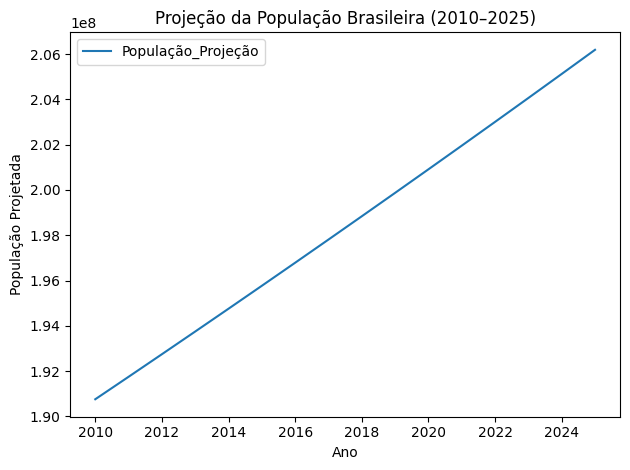

In [ ]:
# Gráfico de linha
anos = list(range(2010, 2026))
df_proj = pd.DataFrame({'Ano': anos})
pop_atual = df['IBGE_RES_POP'].sum()
taxa = 0.0052 #basedo no IBGE que disse que a popução cresce 0,52% ao ano
pop_projecao = []
for i in range(len(df_proj)):
    proj = pop_atual * ((1 + taxa) ** i)
    pop_projecao.append(proj)

df_proj['População_Projeção'] = pop_projecao
pd.options.display.float_format = '{:,.0f}'.format
print(df_proj.round(2))

df_proj.plot(x='Ano', y='População_Projeção', kind='line')
plt.title('Projeção da População Brasileira (2010–2025)')
plt.xlabel('Ano')
plt.ylabel('População Projetada')
plt.tight_layout()
plt.show()

# Gráfico de Barras
df_mg =  df[df['STATE'] == 'MG']
df_mg.groupby('CITY')['IBGE_RES_POP_ESTR'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,8))
plt.title('Total por categoria')
plt.xlabel('CITY')
plt.ylabel('IBGE_RES_POP_ESTR')
plt.show()

# Gráfico de dispersão
plt.scatter(df['Motorcycles'], df['IBGE_DU_RURAL'])
plt.title('Dispersão')
plt.xlabel('Motorcycles')
plt.ylabel('IBGE_DU_RURAL')
plt.show()

Este projeto teve como objetivo explorar e analisar uma base de dados com informações detalhadas sobre os municípios do Brasil baixada diretamente do Kaggle (https://www.kaggle.com/datasets/crisparada/brazilian-cities). A base foi importada em formato CSV (BRAZIL_CITIES.csv), contendo 5570 linhas (com informações de todas as cidades no Brasil) e 81 colunas.

Com a análise feita, foi possível identificar principais regiões de turismo no Brasil, média populacional de pessoas idosas, maiores cidades do Brasil em número de população, além de gráficos como projeção ano a ano da população no país, cidades com maior população estrangeira em MG e uma dispersão entre número de motocicletas e a população rural.

Através da base, é possível responder importantes perguntas mostrando por exemplo regiões com maiores IDH, realizar a correlação entre IDH e renda média das cidades. Também é possível responder perguntas em relação a economia e infraestrutura, como por exemplo número de carros por habitante, cidades com maiores PIB ou setores de economia mais predominante por região.

